In [1]:
import os
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
#import enchant
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
import re
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_curve, roc_auc_score
import itertools
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

%matplotlib inline

In [2]:
def log_progress(sequence, every=None, size=None, name='Items'):
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display

    is_iterator = False
    if size is None:
        try:
            size = len(sequence)
        except TypeError:
            is_iterator = True
    if size is not None:
        if every is None:
            if size <= 200:
                every = 1
            else:
                every = int(size / 200)     # every 0.5%
    else:
        assert every is not None, 'sequence is iterator, set every'

    if is_iterator:
        progress = IntProgress(min=0, max=1, value=1)
        progress.bar_style = 'info'
    else:
        progress = IntProgress(min=0, max=size, value=0)
    label = HTML()
    box = VBox(children=[label, progress])
    display(box)

    index = 0
    try:
        for index, record in enumerate(sequence, 1):
            if index == 1 or index % every == 0:
                if is_iterator:
                    label.value = '{name}: {index} / ?'.format(
                        name=name,
                        index=index
                    )
                else:
                    progress.value = index
                    label.value = u'{name}: {index} / {size}'.format(
                        name=name,
                        index=index,
                        size=size
                    )
            yield record
    except:
        progress.bar_style = 'danger'
        raise
    else:
        progress.bar_style = 'success'
        progress.value = index
        label.value = "{name}: {index}".format(
            name=name,
            index=str(index or '?')
        )

---

## Prepare The Data

In [3]:
import time
import xml.etree.cElementTree as ET

In [4]:
import stop_words

In [144]:
tree = ET.ElementTree(file="laba2_file.xml")
root = tree.getroot()

In [145]:
data_full= []

catalog=root[0][0]
for i in range(50):
    data_full.append(catalog[i].text)
catalog=root[0][1]
for i in range(50,100):
    data_full.append(catalog[i-50].text)
catalog=root[0][2]
for i in range(100,150):
    data_full.append(catalog[i-100].text)
catalog=root[0][3]
for i in range(150,200):
    data_full.append(catalog[i-150].text)

In [146]:
data_full[199]

'турист америк забронирова отпуск жил приложен обнаруж съемн дом скрыт камер сообща профессор джеффр отправ сем новогодн каникул сиэтл отдых обнаруж скрыт записыва устройств разн комнат слов профессор объявлен упоминан вход дом оснащ камер дел висел вход удивл немедлен отключ дума занима стран камер включ ребенок ход голыш посетова материал тем июн вид происход закрыт двер гостиничн номер добав жалоб владелец квартир ответ груб сообщен остав постояльц негативн отз сайт сентябр турист шотланд нашл скрыт камер квартир котор снял отпуск торонт помощ приложен аренд жил путешественник рассказа обнаруж камер сраз установл электрон час лежа стол обратн связ отдел путешеств стал свидетел важн событ новост иде материа напиш адрес важн новост лент дня подписыва'

In [147]:
data_target=[]
for i in range(200):
    data_target.append(0)
    


In [148]:
len(data_target)

200

In [149]:
for i in range(50):
    data_target[i]=0
for i in range(50,100):
    data_target[i]=1
for i in range(100,150):
    data_target[i]=2
for i in range(150,200):
    data_target[i]=3

In [150]:
len(data_target)

200

In [151]:
data_target

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3]

In [152]:
from sklearn.utils import shuffle
data_target , data_full = shuffle(data_target,data_full, random_state=0)
print( data_target , data_full )

[0, 3, 2, 1, 3, 3, 0, 2, 0, 3, 1, 2, 3, 3, 1, 0, 0, 2, 0, 1, 3, 2, 0, 3, 1, 2, 3, 3, 2, 0, 0, 1, 3, 2, 0, 3, 2, 0, 1, 2, 2, 1, 0, 2, 3, 1, 0, 1, 2, 2, 1, 2, 3, 1, 2, 0, 0, 3, 0, 1, 2, 1, 3, 0, 3, 1, 1, 3, 1, 1, 2, 1, 2, 2, 2, 1, 2, 0, 0, 2, 3, 0, 2, 3, 2, 1, 0, 1, 2, 3, 0, 0, 3, 1, 3, 3, 3, 2, 1, 2, 3, 3, 1, 0, 1, 2, 1, 1, 3, 0, 1, 0, 0, 1, 0, 3, 0, 3, 2, 0, 0, 1, 2, 1, 2, 1, 0, 2, 3, 3, 0, 1, 1, 2, 3, 3, 3, 1, 3, 0, 2, 2, 0, 1, 1, 0, 2, 3, 0, 2, 2, 3, 0, 0, 2, 1, 3, 2, 0, 0, 2, 3, 0, 3, 2, 3, 0, 2, 3, 2, 0, 1, 1, 1, 2, 2, 3, 1, 1, 0, 3, 1, 3, 3, 3, 0, 1, 2, 1, 1, 1, 0, 0, 0, 2, 1, 3, 2, 0, 3] ['российск боец смеша стил федор емельяненк рассказа сво состоян поединк американц слов привод тасс бо чувств рассечен глаз глубок вчер налож швов дума пар недел заживет хоч помога готов приеха бо встал утр посмотрет поединок благодар поддержк молитв заяв емельяненк материал тем январ гор американец улож емельяненк перв удар бо продл секунд поединок состоя ноч январ сша американец нокаутирова соп

In [153]:
print( data_target[159] , data_full[159] )

0 тренер российск бойц смеша стил федор емельяненк питер заяв спортсм гот поединк американц слов специалист привод предполож бо емельяненк последн карьер отмет подопечн проблем колен плеч специалист пообеща работа россиянин материал тем январ гор американец улож емельяненк перв удар бо продл секунд тренер рассказа проигра американц поединк емельяненк получ серьезн травм единствен рассечен налож швов поединок рамк фина тяжеловес прошел ноч январ сша нокаутирова емельяненк секунд перв раунд бывш боец олег подел мнен россиянин проблем здоров федор влил снотворн замет спортсм летн емельяненк карьер провел бо одержа побед проигра поединок участ оставл результат важн новост лент дня подписыва


In [154]:
russian_stop_words=stop_words.get_stop_words('ru')
vectorizer = TfidfVectorizer(stop_words=russian_stop_words) 

In [155]:
ng_train= []

for i in range(160):
    ng_train.append(data_full[i])

In [156]:
ng_train[159]

'тренер российск бойц смеша стил федор емельяненк питер заяв спортсм гот поединк американц слов специалист привод предполож бо емельяненк последн карьер отмет подопечн проблем колен плеч специалист пообеща работа россиянин материал тем январ гор американец улож емельяненк перв удар бо продл секунд тренер рассказа проигра американц поединк емельяненк получ серьезн травм единствен рассечен налож швов поединок рамк фина тяжеловес прошел ноч январ сша нокаутирова емельяненк секунд перв раунд бывш боец олег подел мнен россиянин проблем здоров федор влил снотворн замет спортсм летн емельяненк карьер провел бо одержа побед проигра поединок участ оставл результат важн новост лент дня подписыва'

In [157]:
ng_test= []

for i in range(160,200):
    ng_test.append(data_full[i])

In [158]:
ng_test[39]

'пятер жител казахста сдал багаж аэропорт друг снял виде сообща страниц аэропорт вечер январ казахстанц возраст подошл стойк регистрац багаж рейс компан астан поскольк вес чемода значительн превыша допустим бесплатн провоз килограмм пассажир попрос заплат перевес казахстанц отошл стойк регистрац откр чемода показа рук друг сотрудник аэропорт вызва представител служб авиацион безопасн линейн отдел внутрен материал тем январ залет авиапассажир дерут стюардесс доста задержа нарушител гроз штраф суток арест мелк хулиганств отмеча казахстанц снима происходя виде хотел вылож интернет июн россиянин провез сво чемодан вид различн животн скорпион зме летел вьетнам росс стамбул приземлен забра сво багаж отправ обратн стамбул сотрудник таможен контрол обнаруж багаж россиянин контейнер черепах ящериц скорпион лягушк зме мрачн стран новост лент дна подписыва'

In [159]:
len(data_target)

200

In [160]:
ng_train_target= []

for i in range(160):
    ng_train_target.append(data_target[i])
    

In [161]:
ng_train_target

[0,
 3,
 2,
 1,
 3,
 3,
 0,
 2,
 0,
 3,
 1,
 2,
 3,
 3,
 1,
 0,
 0,
 2,
 0,
 1,
 3,
 2,
 0,
 3,
 1,
 2,
 3,
 3,
 2,
 0,
 0,
 1,
 3,
 2,
 0,
 3,
 2,
 0,
 1,
 2,
 2,
 1,
 0,
 2,
 3,
 1,
 0,
 1,
 2,
 2,
 1,
 2,
 3,
 1,
 2,
 0,
 0,
 3,
 0,
 1,
 2,
 1,
 3,
 0,
 3,
 1,
 1,
 3,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 0,
 0,
 2,
 3,
 0,
 2,
 3,
 2,
 1,
 0,
 1,
 2,
 3,
 0,
 0,
 3,
 1,
 3,
 3,
 3,
 2,
 1,
 2,
 3,
 3,
 1,
 0,
 1,
 2,
 1,
 1,
 3,
 0,
 1,
 0,
 0,
 1,
 0,
 3,
 0,
 3,
 2,
 0,
 0,
 1,
 2,
 1,
 2,
 1,
 0,
 2,
 3,
 3,
 0,
 1,
 1,
 2,
 3,
 3,
 3,
 1,
 3,
 0,
 2,
 2,
 0,
 1,
 1,
 0,
 2,
 3,
 0,
 2,
 2,
 3,
 0,
 0,
 2,
 1,
 3,
 2,
 0,
 0]

In [162]:
data_train = []
y_train = []

for data, lbl in zip(ng_train, ng_train_target):
    filtered = re.findall(u'(?u)\\b\\w\\w+\\b', data)
    filtered = [filt for filt in filtered ]
    data_train.append(' '.join(filtered).lower())
    y_train.append(lbl)
    
y_train = np.asarray(y_train)
    
print(len(data_train), len(y_train))

160 160


In [163]:
ng_test_target= []

for i in range(160,200):
    ng_test_target.append(data_target[i])

In [164]:
data_test = []
y_test = []

for data, lbl in zip(ng_test, ng_test_target):
    filtered = re.findall(u'(?u)\\b\\w\\w+\\b', data)
    filtered = [filt for filt in filtered]
    data_test.append(' '.join(filtered).lower())
    y_test.append(lbl)
    
y_test = np.asarray(y_test)
    
print(len(data_test), len(y_test))

40 40


In [165]:
X_train = vectorizer.fit_transform(data_train)
X_test = vectorizer.transform(data_test)

print(X_train.shape, X_test.shape)

(160, 9783) (40, 9783)


In [166]:
X_train

<160x9783 sparse matrix of type '<class 'numpy.float64'>'
	with 30444 stored elements in Compressed Sparse Row format>

---

## Build Models

* **Logistic Regression**
* **SVM**
* **Random Forest**
* **Gradient Boosting Trees**

**Define classifiers:**

In [167]:
predictor_lr = LogisticRegression().fit(X_train, y_train)

In [168]:
predictor_svm = LinearSVC().fit(X_train, y_train)

In [169]:
predictor_rf = RandomForestClassifier(n_estimators=1000).fit(X_train, y_train)

In [170]:
predictor_gbt = GradientBoostingClassifier(n_estimators=100).fit(X_train, y_train)

**Evaluate Classifiers:**

In [171]:
y_pred_lr = predictor_lr.predict(X_test)
print ('LR accuracy: {}%'.format(round(np.mean(y_test == y_pred_lr), 2)))

LR accuracy: 0.95%


In [172]:
y_pred_svm = predictor_svm.predict(X_test)
print ('LR accuracy: {}%'.format(round(np.mean(y_test == y_pred_svm), 2)))

LR accuracy: 0.95%


In [173]:
y_pred_rf = predictor_rf.predict(X_test)
print ('RF accuracy: {}%'.format(round(np.mean(y_test == y_pred_rf), 2)))

RF accuracy: 0.92%


In [174]:
y_pred_gbt = predictor_gbt.predict(X_test)
print ('GBT accuracy: {}%'.format(round(np.mean(y_test == y_pred_gbt), 2)))

GBT accuracy: 0.82%


### [Confusion Matrices](http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py)


In [175]:
def plot_confusion_matrix(cm, title='Contingency matrix'):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(15, 15))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(cm.shape[0])
    classes = [x.split('.')[-1] for x in num_categories]
    plt.xticks(tick_marks, classes, rotation=45, size=14)
    plt.yticks(tick_marks, classes, size=14)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', fontsize=18)
    plt.xlabel('Predicted label', fontsize=18)

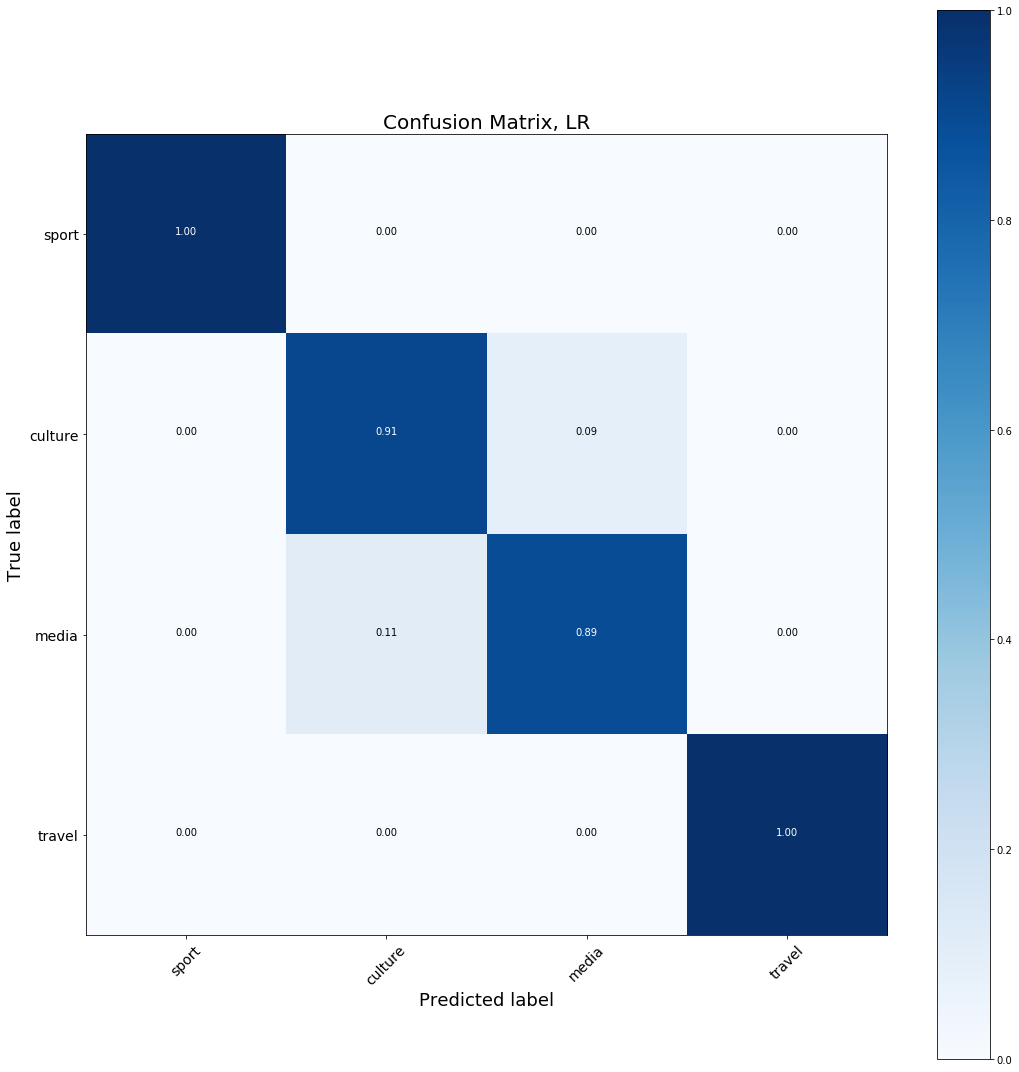

In [176]:
cmt_lr = confusion_matrix(y_test, y_pred_lr)
plot_confusion_matrix(cmt_lr, title='Confusion Matrix, LR')

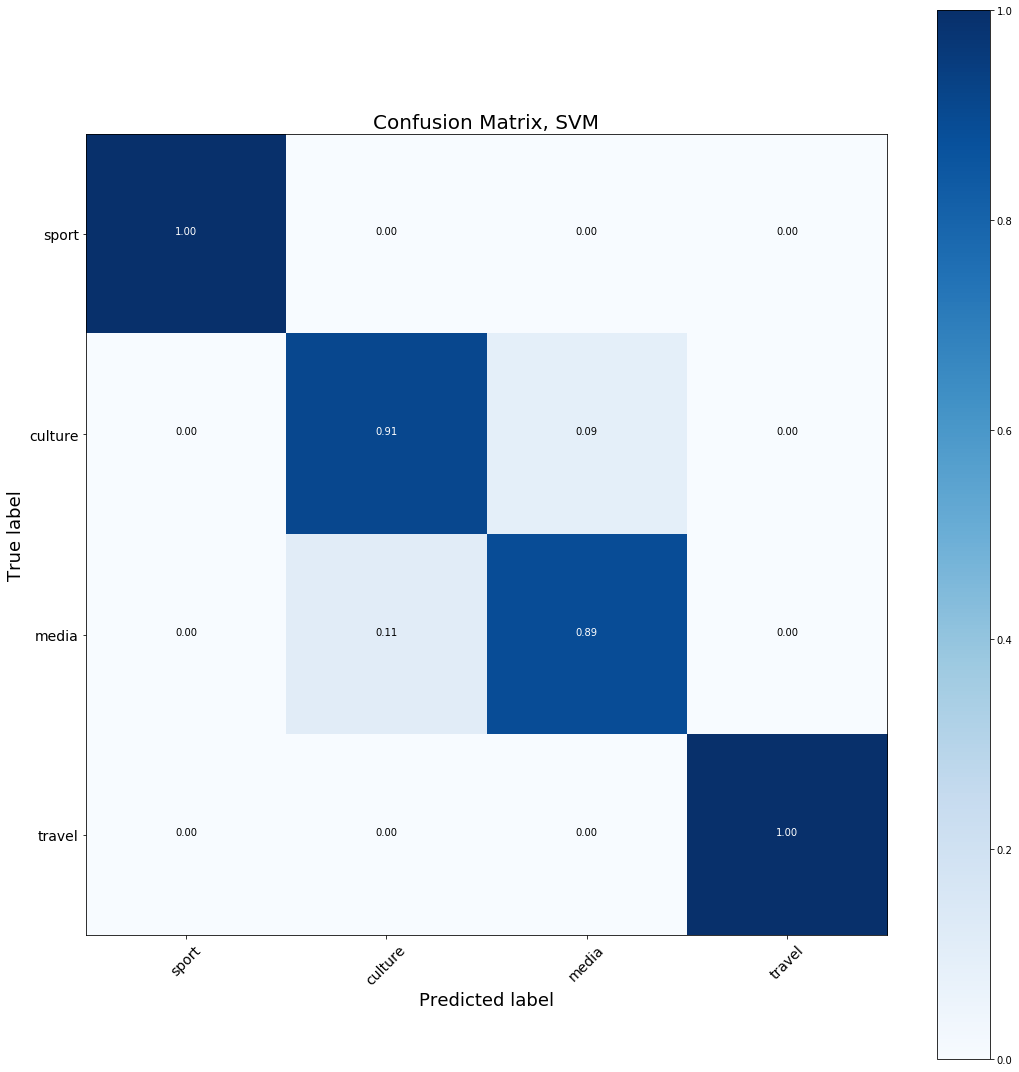

In [177]:
cmt_svm = confusion_matrix(y_test, y_pred_svm)
plot_confusion_matrix(cmt_svm, title='Confusion Matrix, SVM')

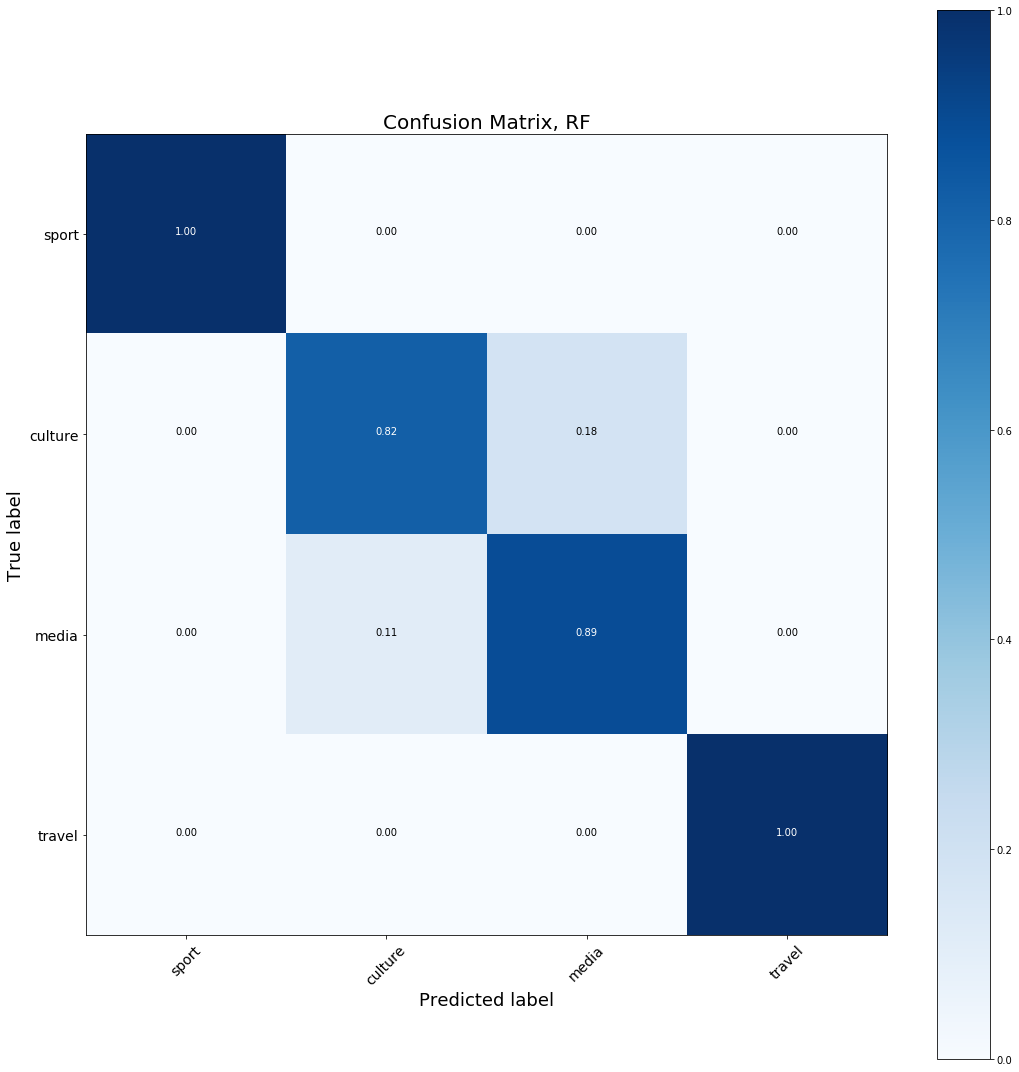

In [178]:
cmt_rf = confusion_matrix(y_test, y_pred_rf)
plot_confusion_matrix(cmt_rf, title='Confusion Matrix, RF')

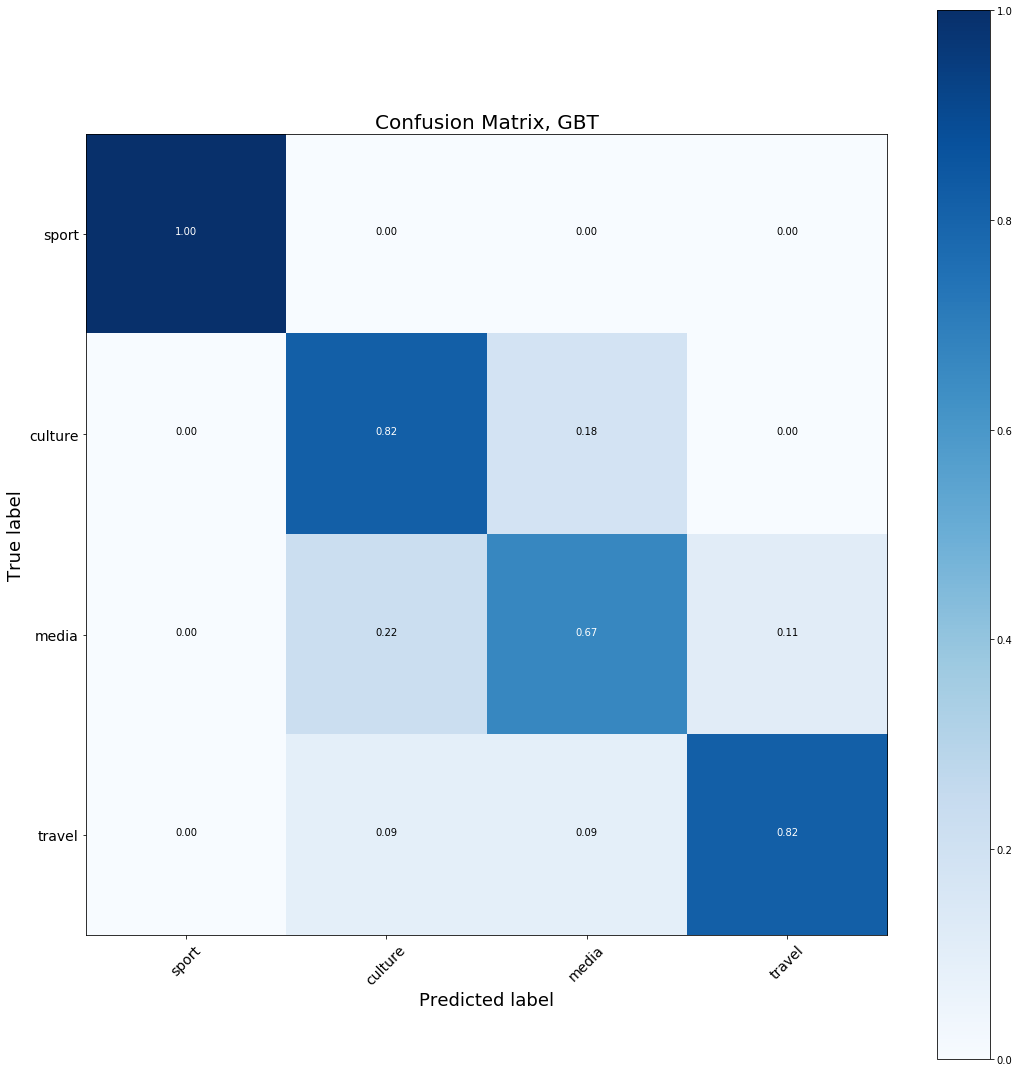

In [179]:
cmt_gbt = confusion_matrix(y_test, y_pred_gbt)
plot_confusion_matrix(cmt_gbt, title='Confusion Matrix, GBT')

### Feature Importances:

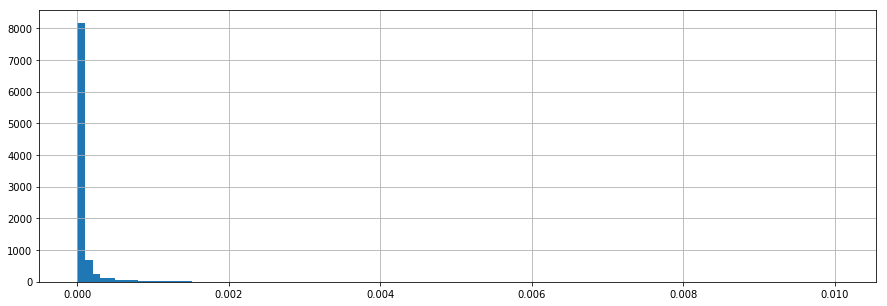

In [248]:
plt.figure(figsize=(15, 5))

plt.hist(predictor_rf.feature_importances_, bins=100)
plt.grid(True)

(0, 0.001)

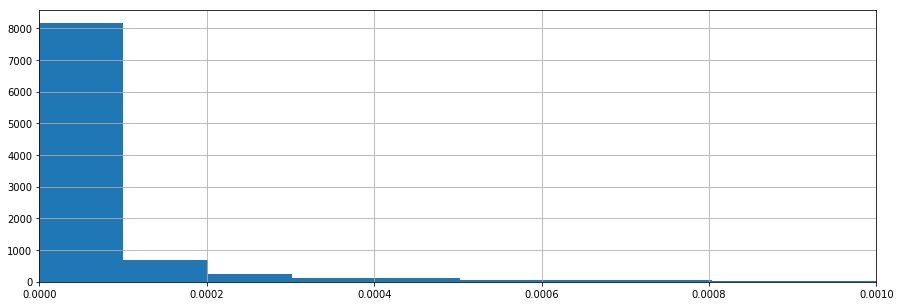

In [181]:
plt.figure(figsize=(15, 5))

plt.hist(predictor_rf.feature_importances_, bins=100)
plt.grid(True)
plt.xlim(0, 0.001)

**Create feature selector:**

In [182]:
feature_selector = SelectFromModel(RandomForestClassifier(n_estimators=10)).fit(X_train, y_train)

In [183]:
X_train_transformed = feature_selector.transform(X_train)
X_test_transformed = feature_selector.transform(X_test)

print (X_train_transformed.shape, X_test_transformed.shape)

(160, 340) (40, 340)


**Train and evaluate the new classifier:**

In [184]:
predictor_lr_ = LogisticRegression().fit(X_train_transformed, y_train)

In [185]:
y_pred_lr_ = predictor_lr_.predict(X_test_transformed)
print ('LR (with feature selection) accuracy: {}%'.format(round(np.mean(y_test == y_pred_lr_), 2)))

LR (with feature selection) accuracy: 0.88%


### Binary Classification

In [186]:
predictor_oneVSall = OneVsRestClassifier(LinearSVC(), n_jobs=8).fit(X_train, y_train)

In [187]:
y_pred_onevsall = predictor_oneVSall.predict(X_test)
print ('One-VS-all accuracy: {}%'.format(round(np.mean(y_test == y_pred_onevsall), 2)))

One-VS-all accuracy: 0.95%


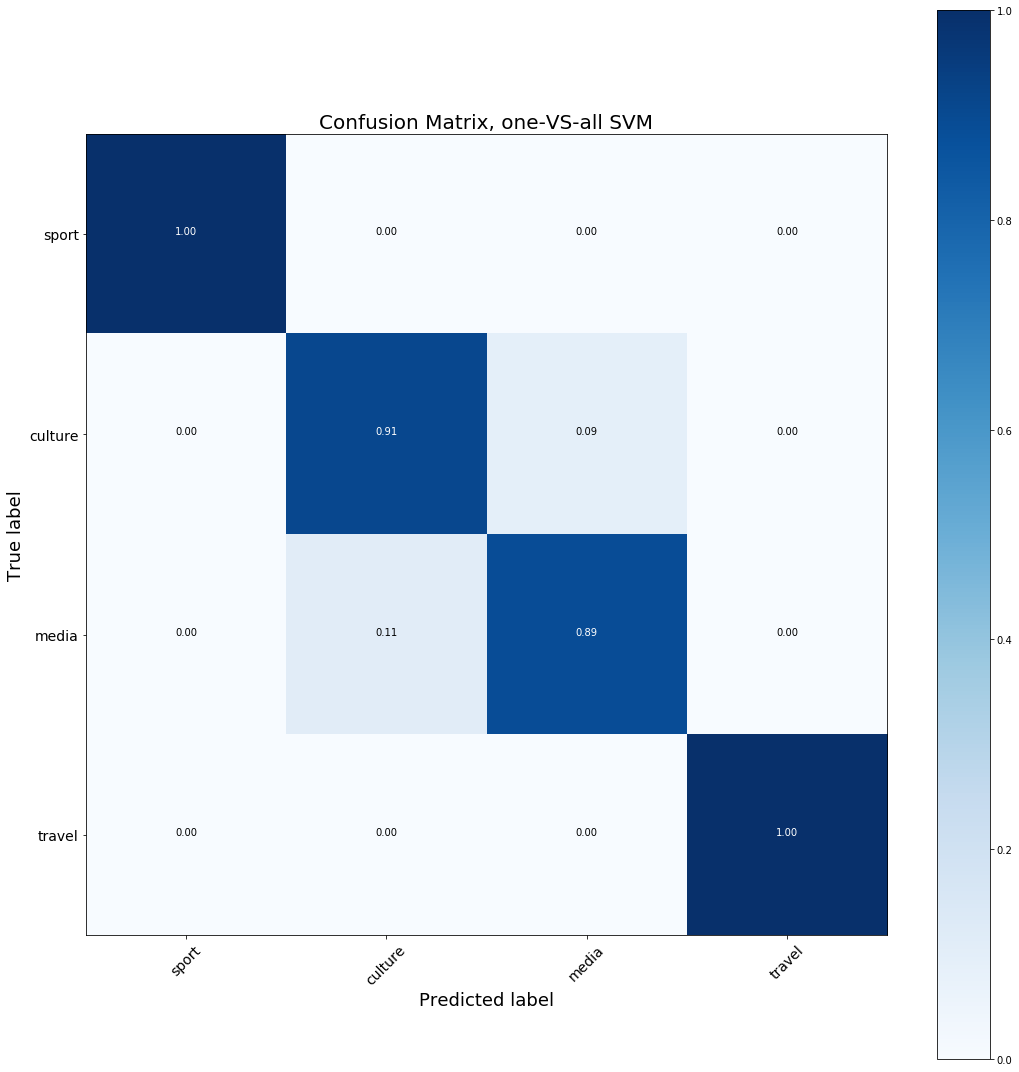

In [188]:
cmt_svm_onevsall = confusion_matrix(y_test, y_pred_onevsall)
plot_confusion_matrix(cmt_svm_onevsall, title='Confusion Matrix, one-VS-all SVM')

In [189]:
predictor_oneVSone = OneVsOneClassifier(LinearSVC(), n_jobs=8).fit(X_train, y_train)

In [190]:
y_pred_onevsone = predictor_oneVSone.predict(X_test)
print ('One-VS-one accuracy: {}%'.format(round(np.mean(y_test == y_pred_onevsone), 2)))

One-VS-one accuracy: 0.95%


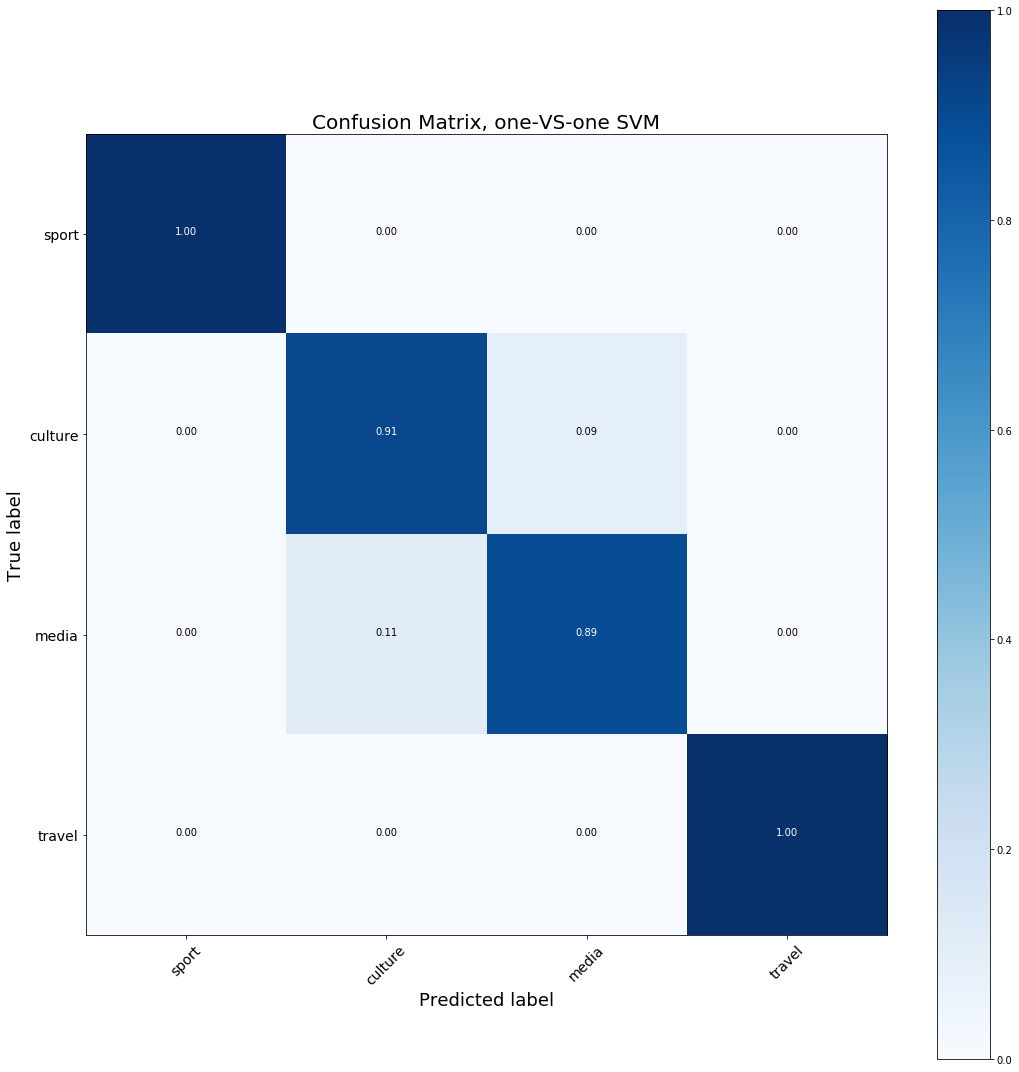

In [191]:
cmt_svm_onevsone = confusion_matrix(y_test, y_pred_onevsone)
plot_confusion_matrix(cmt_svm_onevsone, title='Confusion Matrix, one-VS-one SVM')

In [192]:
for c in np.unique(y_train):
    print ('Class \'{}\' samples N: {}'.format(c, y_train[y_train == c].shape[0]))

Class '0' samples N: 41
Class '1' samples N: 39
Class '2' samples N: 41
Class '3' samples N: 39


In [216]:
X_train_bin = X_train[(y_train == 1) | (y_train == 3)]
y_train_bin = y_train[(y_train == 1) | (y_train == 3)]

y_train_bin[y_train_bin == 1] = 0
y_train_bin[y_train_bin == 3] = 1

print(X_train_bin.shape, y_train_bin.shape)

(78, 9783) (78,)


In [217]:
X_test_bin = X_test[(y_test == 1) | (y_test == 3)]
y_test_bin = y_test[(y_test == 1) | (y_test == 3)]

y_test_bin[y_test_bin == 1] = 0
y_test_bin[y_test_bin == 3] = 1

print (X_test_bin.shape, y_test_bin.shape)

(22, 9783) (22,)


In [218]:
one_binary_predictor = RandomForestClassifier(n_estimators=100).fit(X_train_bin, y_train_bin)

### [Metrics](https://en.wikipedia.org/wiki/Precision_and_recall)

In [219]:
y_pred_binary = one_binary_predictor.predict(X_test_bin)

print ('Binary classifiers accuracy: {}%'.format(round(np.mean(y_pred_binary == y_test_bin), 2)))

Binary classifiers accuracy: 1.0%


In [220]:
def FP(y_true, y_pred):
    return float(np.sum(y_true[y_true == 0] != y_pred[y_true == 0]))

In [221]:
def TP(y_true, y_pred):
    return float(np.sum(y_true[y_true == 1] == y_pred[y_true == 1]))

In [222]:
def FN(y_true, y_pred):
    return float(np.sum(y_true[y_true == 1] != y_pred[y_true == 1]))

In [223]:
def TN(y_true, y_pred):
    return float(np.sum(y_true[y_true == 0] == y_pred[y_true == 0]))

In [224]:
fp = FP(y_test_bin, y_pred_binary)
fn = FN(y_test_bin, y_pred_binary)
tp = TP(y_test_bin, y_pred_binary)
tn = TN(y_test_bin, y_pred_binary)

print ('TP = {}, FP = {}, TN = {}, FN = {}\n---------------------------------------------\nsum = {}'.format(tp, fp, tn, fn, tp + fp + tn + fn))

TP = 11.0, FP = 0.0, TN = 11.0, FN = 0.0
---------------------------------------------
sum = 22.0


In [225]:
P = precision_score(y_test_bin, y_pred_binary)
R = recall_score(y_test_bin, y_pred_binary)

print ('Precision: {}, Recall: {}'.format(P, R))

Precision: 1.0, Recall: 1.0


In [226]:
print (tp / (tp + fp), tp / (tp + fn))

1.0 1.0


In [227]:
print ('F1: {}'.format(f1_score(y_test_bin, y_pred_binary)))

F1: 1.0


In [228]:
print (2.0 * P * R / (P + R))

1.0


In [229]:
scores_binary = one_binary_predictor.predict_proba(X_test_bin)[:, 1]

print (scores_binary.shape)

(22,)


In [230]:
fpr, tpr, thresholds = roc_curve(y_test_bin, scores_binary)

(-0.1, 1.1)

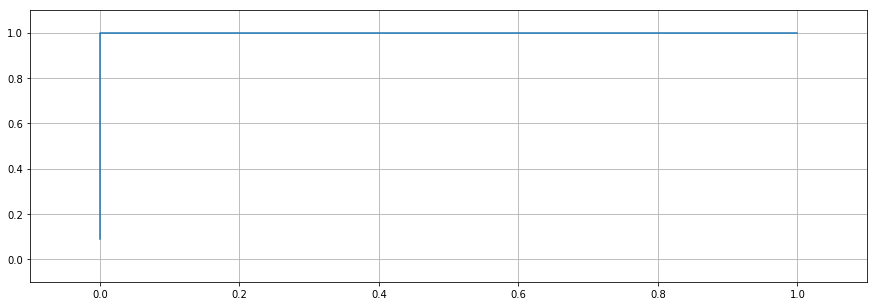

In [231]:
plt.figure(figsize=(15, 5))

inds = np.argsort(fpr)
plt.plot(fpr[inds], tpr[inds])
plt.grid(True)
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)

In [232]:
roc_auc = roc_auc_score(y_test_bin, scores_binary)

print ('AUC score: {}'.format(roc_auc, 2))

AUC score: 1.0


In [233]:
f1_max = 0
y_pred_best = None

for thr in thresholds:
    y_pred_tuned = scores_binary.copy()
    y_pred_tuned[y_pred_tuned < thr] = 0
    y_pred_tuned[y_pred_tuned >= thr] = 1
    
    f1 = f1_score(y_test_bin, y_pred_tuned)
    if f1 > f1_max:
        f1_max = f1
        y_pred_best = y_pred_tuned
    if f1 > 0.894308943089:
        print ('thr = {}: F1 +{}'.format(thr, round(f1 - 0.8920570264765784, 4)))
        
print()
print ('Max. F1: {}'.format(round(f1_max, 3)))

thr = 0.52: F1 +0.1079
thr = 0.38: F1 +0.0645

Max. F1: 1.0


In [234]:
print (np.mean(y_test_bin == y_pred_best))

1.0


## Ensembling

In [235]:
print (np.mean(RandomForestClassifier(n_estimators=10).fit(X_train, y_train).predict(X_test) == y_test))
print (np.mean(RandomForestClassifier(n_estimators=100, criterion='entropy').fit(X_train, y_train).predict(X_test) == y_test))
print (np.mean(GradientBoostingClassifier(n_estimators=10).fit(X_train, y_train).predict(X_test) == y_test))

0.825
0.9
0.825


In [236]:
ensemble_soft = VotingClassifier([('rf_gini_10', RandomForestClassifier(n_estimators=10)),
                                  ('rf_entropy_100', RandomForestClassifier(n_estimators=100, criterion='entropy')),
                                  ('gbt_100', GradientBoostingClassifier(n_estimators=10))], voting='soft', n_jobs=1)

ensemble_hard = VotingClassifier([('rf_gini_10', RandomForestClassifier(n_estimators=10)),
                                  ('rf_entropy_100', RandomForestClassifier(n_estimators=100, criterion='entropy')),
                                  ('gbt_100', GradientBoostingClassifier(n_estimators=10))], voting='hard', n_jobs=1)

In [237]:
ensemble_soft.fit(X_train, y_train)
ensemble_hard.fit(X_train, y_train)

VotingClassifier(estimators=[('rf_gini_10', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
          ...      presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [238]:
y_pred_hard = ensemble_hard.predict(X_test)
y_pred_soft = ensemble_soft.predict(X_test)

print (y_pred_hard.shape, y_pred_soft.shape)

(40,) (40,)


C:\Users\fialk\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\fialk\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [239]:
print ('Hard voting accuracy: {}%'.format(round(np.mean(y_test == y_pred_hard), 2)))
print ('Soft voting accuracy: {}%'.format(round(np.mean(y_test == y_pred_soft), 2)))

Hard voting accuracy: 0.88%
Soft voting accuracy: 0.88%


In [240]:
num_categories=['sport','culture','media','travel']

In [126]:
num_categories[0]

'sport'

In [241]:
y_pred_onevsone

array([2, 3, 0, 3, 1, 3, 0, 2, 3, 2, 0, 1, 1, 2, 2, 2, 3, 1, 1, 0, 3, 1,
       3, 3, 3, 0, 1, 2, 1, 1, 1, 0, 0, 0, 2, 1, 3, 2, 0, 3])

In [242]:
len(y_pred_onevsone)

40

In [243]:
y_test

array([2, 3, 0, 3, 2, 3, 0, 2, 3, 2, 0, 1, 1, 1, 2, 2, 3, 1, 1, 0, 3, 1,
       3, 3, 3, 0, 1, 2, 1, 1, 1, 0, 0, 0, 2, 1, 3, 2, 0, 3])

In [244]:
data_test[4]

'осен владельц русск верс реш продлева лиценз преврат журна издан популяризир российск евразийск кин появ кинорепортер главн реактор мар лемешев поговор итог прошл перспектив российск киноиндустр дава начн реперн точек может назва сам знаков отраслев событ прошл мар лемешев нача движен рекордн отметк прокат котор вынужд оглядыва создател нов потенциальн кассов хит значим так успех свод логик спортивн соревнован заработа чемпион сраз подошл извечн вопрос важн главн выручк прокат художествен достоинств дума прежд формир нов точк отсчет поэт отмахнут прокатн результат например фильм тренер вполн приличн призм успех движен смотр убедительн кстат тренер втор вполн осяза тенденц ушедш популярн актер примеря режиссерск кресл козловск постав тренер правд отказа главн рол фильм вполн понятн начина режиссер прощ найт общ язык опытн артист дава прощ провальн средненьк удачн точк зрен развит индустр безусловн удачн пожал реша точк зрен понима сложн дава однозначн оценк изнутр име дистанц положен в

In [245]:
y_pred_binary

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1])

In [246]:
y_test_bin

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1])